In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [2]:
price_bins = [0, 20, 40, float('inf')]
price_labels = ['low', 'medium', 'high']

# Create a new categorical target variable based on price ranges
df['price_category'] = pd.cut(df['Y house price of unit area'], bins=price_bins, labels=price_labels)

# Split the data into features and the new categorical target variable
X = df.drop(['Y house price of unit area', 'price_category'], axis=1)
y = df['price_category']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.85      0.92        20
         low       1.00      1.00      1.00         6
      medium       0.84      1.00      0.91        16

    accuracy                           0.93        42
   macro avg       0.95      0.95      0.94        42
weighted avg       0.94      0.93      0.93        42

Decision Tree Confusion Matrix:
[[17  0  3]
 [ 0  6  0]
 [ 0  0 16]]


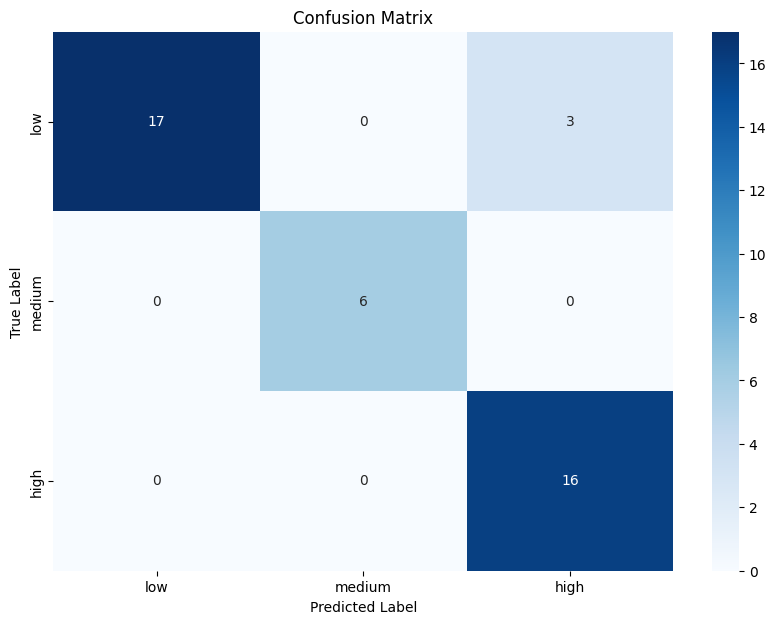

In [5]:
# Assume y_test and y_pred are defined as per your script outputs
cm = confusion_matrix(y_test, y_pred)
class_names = ['low', 'medium', 'high']  # Names of the classes in the order of the labels

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


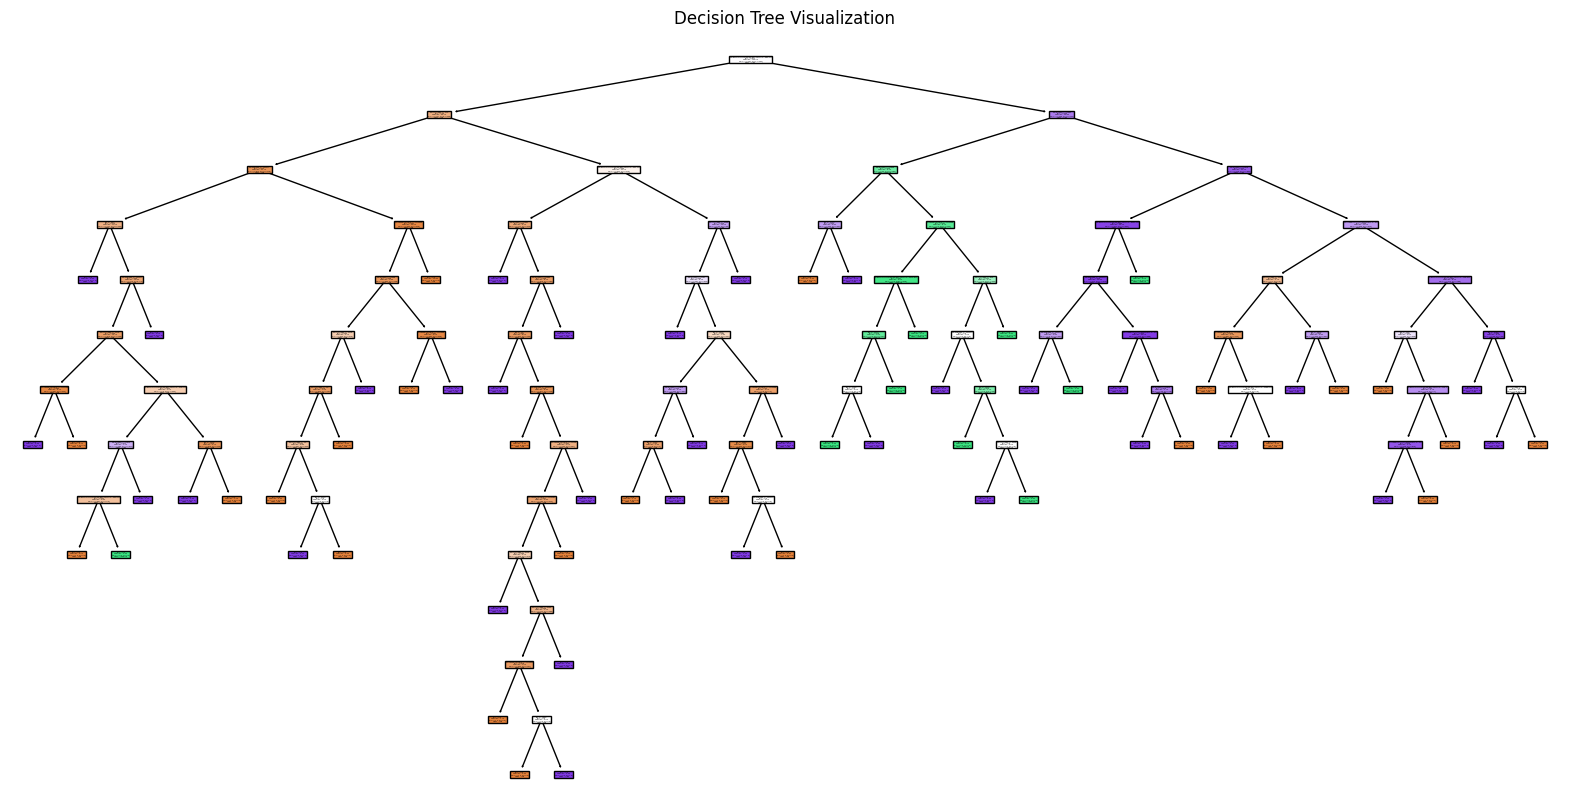

In [8]:
plt.figure(figsize=(20,10))  # Set an appropriate size to make sure the tree is readable
plot_tree(dt_classifier, feature_names=X.columns, class_names=class_names, filled=True, proportion=True)
plt.title('Decision Tree Visualization')
plt.show()
